<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Curvas de Potencial</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h4 class="alert-heading">Universidad Industrial de Santander</h4>
  </div>

**<font color=green size=5>OPCIÓN 1**

**<font color=green> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter obtenemos curvas de potencial 2D de moléculas diatómicas y triatómicas.** 

In [10]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import h5py
import pandas as pd
%matplotlib inline

**<font color=green> Inicializamos las condiciones de maquina.** 

In [11]:
psi4.core.clean()
psi4.core.clean_options()
psi4.set_memory('2000 MB')  # Memoria que sera utilizada en el cálculo
psi4.set_num_threads(8)    # Cnatida de hilos a utilzar, tener en cuenta que un núcleo soporta 24 hilos
psi4.core.set_output_file('./Data/pes1.dat', False)

**<font color=green> Definimos la geometría de la molécula (HF), en este caso en formato Z-matriz y asignando la distancia entre los dos átomos con una variable *R*.** 

In [12]:
IPythonConsole.molSize = 50,30
hf = Chem.MolFromSmiles('F')
hf

In [13]:
HF = """H
F 1 **R**"""
rvals = [0.8, 0.85, 0.9, 0.95, 1.0]

**<font color=green> Obtenemos los valores de energía para los diferentes valor de *R* utilizando *Hatree Fock (HF)* como métdo de cálculo y la base *cc-pVDZ*.** 

In [14]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(HF.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/3-21g", molecule=mol)
    energies.append(energy)
print(rvals)
print(energies)

[0.8, 0.85, 0.9, 0.95, 1.0]
[-99.43210493039616, -99.45017781051483, -99.45856808038955, -99.460033481349, -99.45655192660854]


**<font color=green> Ahora vamos a utilizar un arreglo más grande de valores de *R* y la molécula de Nitrógeno (N2) con el fín de graficar los resultados.** 

In [22]:
IPythonConsole.molSize = 50,30
hf = Chem.MolFromSmiles('N#N')
hf

In [15]:
N2 = """N
N 1 **d**"""
rvalsn2 = np.linspace(0.7, 4, 50)

**<font color=green>Obtenemos las energías.** 

In [18]:
molecules =[]
energies = []
for r in rvalsn2:
    molecule = psi4.geometry(N2.replace("**d**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
#print(rvals)
print(energies)

[-107.61328499560439, -108.20671302722226, -108.57267687584132, -108.78736856591172, -108.90136302740973, -108.94877519190801, -108.95281817650815, -108.9292822013627, -108.88885084340791, -108.83871081855055, -108.78366675277759, -108.72689212839227, -108.67043027682652, -108.61553976379312, -108.56294543495999, -108.51302431075479, -108.46593778020008, -108.42171824638284, -108.38032101754276, -108.34165372308337, -108.30559366670029, -108.27199960609799, -108.24072076544688, -108.2116037772521, -108.18449763667253, -108.15925687295835, -108.13574335554377, -108.11382720236956, -108.09338716330812, -108.07431071050516, -108.05649395245459, -108.03984142230142, -108.02426576411682, -108.009687334141, -107.99603373246819, -107.98323927848912, -107.97124444080303, -107.95999523233041, -107.94944258381521, -107.93954171516936, -107.93025152676435, -107.92153403575618, -107.91335387615192, -107.90567787885388, -107.89847473519696, -107.89171474188981, -107.88536961814589, -107.87941238224

**<font color=green>Graficamos.** 

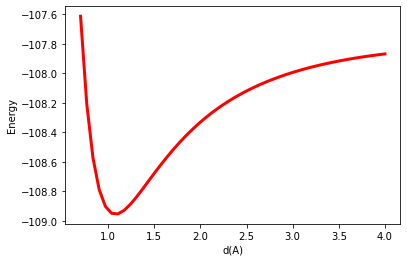

In [22]:
fig, ax = plt.subplots()
#ax.scatter(rvalsn2, energies, color='red', edgecolors=(0, 0, 0))
ax.plot(rvalsn2, energies, color='red', lw=3)
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
plt.show()

**<font color=blue size=5>OPCIÓN 2**

**<font color=blue> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter obtenemos curvas de potencial 2D de moléculas diatómicas y triatómicas.** 

In [10]:
# Definimos la Molécula
n2 = """
n
n   1 hh2     

hh2 = {0}"""

# Métodos de cálculo
method1 = 'scf/cc-pvdz'
method2 = 'casscf/cc-pvdz'

psi4.core.set_output_file('./Data/n2-cas-symm.dat', False) 

In [11]:
rn =[]
energies = []
rn2 = np.linspace(0.7, 4, num=50)
for r in rn2:
    molecula = psi4.geometry(n2.format(r))
    molecula.reset_point_group('d2h')
    psi4.set_options({'fail_on_maxiter':'false'})
    psi4.set_options({'restricted_docc':[1,0,0,0,0,1,0,0]})
    psi4.set_options({'active':[2,0,1,1,0,2,1,1]})
    Ei, wfni = psi4.energy(method2, molecule = molecula, return_wfn = True)
    rn.append(r)
    energies.append(Ei)
    #psi4.molden(wfni,"n2-cas-symm."+str(r)+".molden") # Guarda cada uno en formato molden 
    
#np.savetxt("n2-cas-symm.csv", energies, delimiter=",",header='H-H Distance,E',comments='')

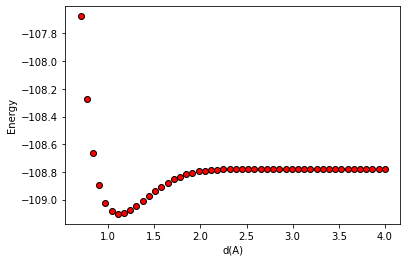

In [11]:
fig, ax = plt.subplots()
ax.scatter(rn, energies, color='red', edgecolors=(0, 0, 0))
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
plt.show()

**<font color=green>Podemos realizar los mismos calculos sobre el ángulo *H-O-H* y graficar los resultados.** 

In [12]:
# Vamos a definir otra forma de flexibilizar unos de los parámetros structurales, en este casp el ángulo
# entre los hidrógeno, utilizamos el formato Z-matrix
H2O_angle = """
O
H 1 0.96
H 1 0.96 2 {}
"""

# Scan del ángulo se realizará en el interválo de 30 330, en incrementos de 5 grados
scan = {}
for angle in range(30, 331, 5):
    # Llamamos la molécula en sus diferentesa ángulos
    mol = psi4.geometry(H2O_angle.format(angle))
    # se evoca psi4
    e = psi4.energy('scf/cc-pvdz', molecule=mol) # usamos HF y la base cc-pvdz
    
    # guardamos los resultados
    scan[angle] = e

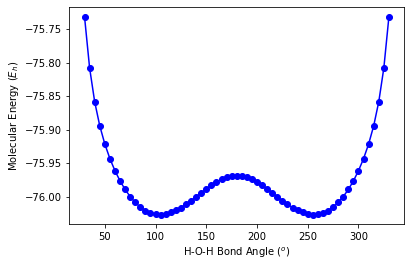

In [13]:
# Visualizar el pérfil de energía
x = list(scan.keys())
y = list(scan.values())
plt.plot(x,y,'bo-')
plt.xlabel(r'H-O-H Bond Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

**<font color=green>Vamos a realizar la curva de potencial angular de la molécula de peróxido de hidrógeno (HOOH), aquí se variará el ángulo dihedro *dih4* manteniendo fijos los demás átomos.** 

In [14]:
HOOH_ang= """
    o
 o   1 oo2     
 h    1 ho3         2 hoo3      
 h    2 ho4         1 hoo4          3 dih4   
 
oo2=        1.462461
ho3=        0.954335
hoo3=       101.178
ho4=        0.954364
hoo4=       101.183
dih4=       {0}"""

In [15]:
# Archivo de salida
psi4.core.set_output_file('./Data/PES_rot_rig.dat', False)

E_theta = np.empty((0,2)) # Una marix 2D para almacenar los resultados
for theta in range(0, 361, 5): # Se scanearán estos ángulos
    # Optimizamos la molécula en sus diferentesa ángulos
    HOOH = psi4.geometry(HOOH_ang.format(theta))
    # Calculamos la energía
    Ei, wfni = psi4.energy('scf/6-31G', molecule = HOOH, return_wfn = True) # usamos HF y la base 6-31G
    E_theta = np.append(E_theta, [[theta,Ei]], axis=0) # Almacenamos los resultados, theta y Energía
    # Guardamos en el formato molden cada una de las estructuras optimizadas para cada ángulo
    psi4.molden(wfni,"./Data/PES_rot_rig."+str(theta)+".molden")

np.savetxt("./Data/PES_rot_rig.csv", E_theta, delimiter=",",header='H-O-O-H Dihedral Angle,E_rigid',comments='')
PES=pd.DataFrame(E_theta)

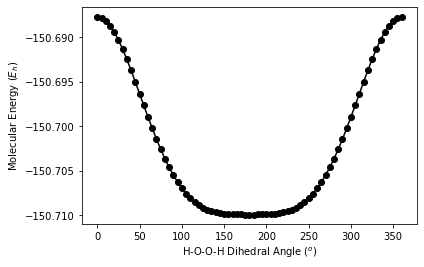

In [18]:
# Visualizar el pérfil de energía
x = PES[0]
y = PES[1]
plt.plot(x,y,'ko-')
plt.xlabel(r'H-O-O-H Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

**<font color=green>Vamos a realizar la curva de potencial angular de la molécula de peróxido de hidrógeno (HOOH), aquí se variará el ángulo dihedro *dih4* pero ahora permitiendo que las demás coordenadas (ángulos, enlaces) se otimizan con cada variación.** 

In [49]:
# Archivo de salida
psi4.core.set_output_file('./Data/PES_rot_relax.dat', False)

E_theta = np.empty((0,2)) # Una marix 2D para almacenar los resultados
for theta in range(0, 361, 5): # Se scanearán estos ángulos
    # Optimizamos la molécula en sus diferentes ángulos
    HOOH = psi4.geometry(HOOH_ang.format(theta))
    # Reseteamos la simetría
    HOOH.reset_point_group('c1')
    # mantenemos fijo el angulo dihedro que esta entre los atomos 4, 2, 1 y 3 mientras se optimiza la molécula
    psi4.set_module_options('optking', {'frozen_dihedral': '4 2 1 3 '})
    # Calculamos la energía
    Ei, wfni = psi4.energy('scf/6-31G', molecule = HOOH, return_wfn = True) # usamos HF y la base 6-31G
    E_theta = np.append(E_theta, [[theta,Ei]], axis=0) # Almacenamos los resultados, theta y Energía
    # Guardamos en el formato molden cada una de las estructuras optimizadas para cada ángulo
    #psi4.molden(wfni,"/home/emejia/Documents/PES_rot_relax."+str(theta)+".molden")

np.savetxt("./Data/PES_rot_relax.csv", E_theta, delimiter=",",header='H-O-O-H Dihedral Angle,E_rigid',comments='')
PES2=pd.DataFrame(E_theta)

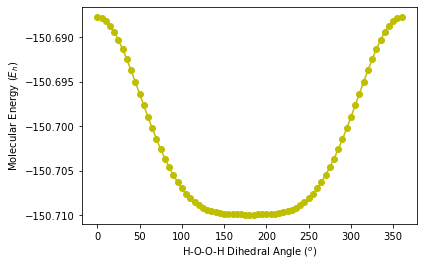

In [48]:
# Visualizar el pérfil de energía
x = PES2[0]
y = PES2[1]
plt.plot(x,y,'yo-')
plt.xlabel(r'H-O-O-H Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

In [39]:
h2o = """
O
H 1 **R**
H 1 **R** 2 **A**
"""
#R = {0}
#A = {0}"""

In [47]:
h2o = """
O
H 1 **R**
H 1 **R** 2 **A**
"""

Rvals=np.arange(0.7, 1.5, 0.1)
Avals=range(60,160,2)

rows = []
table = []

#set basis cc-pvdz

for a in Avals:
    h2o=h2o.replace("**A**", str(a))
    for r in Rvals:
        water = psi4.geometry(h2o.replace("**R**", str(r)))
        psi4.energy('mp2/cc-pvdz', molecule=water)
        escf = psi4.variable('SCF TOTAL ENERGY')
        edfmp2 = psi4.variable('MP2 TOTAL ENERGY')
        escsmp2 = psi4.variable('SCS-MP2 TOTAL ENERGY')
        rows.append((r, a))
        table.append([escf, escsmp2, edfmp2])

import pandas as pd
df = pd.DataFrame(table, columns = ["E(SCF)", "E(SCS)", "E(DFMP2)"], index=rows)
print(df)

#                E(SCF)     E(SCS)   E(DFMP2)
# (0.9, 100) -76.020680 -76.217006 -76.221189
# (0.9, 102) -76.021305 -76.217439 -76.221605
# (1.0, 100) -76.021264 -76.224987 -76.228727
# (1.0, 102) -76.021460 -76.224946 -76.228668
# (1.1, 100) -75.990195 -76.201891 -76.205087
# (1.1, 102) -75.990085 -76.201498 -76.204676

                              E(SCF)     E(SCS)   E(DFMP2)
(0.7, 60)                 -75.655446 -75.841069 -75.846476
(0.7999999999999999, 60)  -75.862554 -76.055743 -76.061103
(0.8999999999999999, 60)  -75.945434 -76.146316 -76.151526
(0.9999999999999999, 60)  -75.962900 -76.171670 -76.176612
(1.0999999999999999, 60)  -75.946259 -76.162863 -76.167402
...                              ...        ...        ...
(0.9999999999999999, 158) -75.962900 -76.171670 -76.176612
(1.0999999999999999, 158) -75.946259 -76.162863 -76.167402
(1.1999999999999997, 158) -75.912592 -76.136535 -76.140527
(1.2999999999999998, 158) -75.871358 -76.101535 -76.104840
(1.4, 158)                -75.827890 -76.062357 -76.064841

[400 rows x 3 columns]


In [11]:
import rdkit
from rdkit import Chem

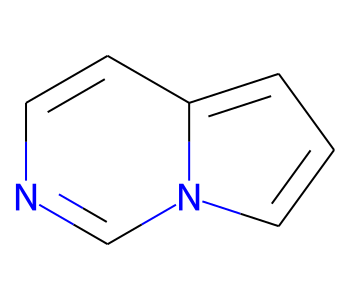

In [23]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350,300
doravirine = Chem.MolFromSmiles('c1nccc2n1ccc2')
doravirine